In [1]:
%cd ..

/home/napulen/AugmentedNet


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from AugmentedNet.feature_representation import COMMON_ROMAN_NUMERALS

In [3]:
df = pd.read_csv('evaluation.csv')

In [4]:
def rare_chords(conf_matrix):
    counts = np.sum(conf_matrix, axis=1) + 0.001
    print(sum(counts))
    perc = counts / sum(counts)
    rn_counts = {COMMON_ROMAN_NUMERALS[i]: (perc[i], conf_matrix[i][i] / counts[i]) for i in range(len(COMMON_ROMAN_NUMERALS))}
    rn_counts = sorted(rn_counts.items(), key=lambda x: x[1][0])
    for rn, count in rn_counts:
        print(f"{rn}\t{100 * count[0]:.2f}%\t{count[1]:.2f}")
    return rn_counts

micchi2021
155120.03099999984
III+7	0.02%	0.00
Fr7	0.03%	0.00
III+	0.06%	0.00
I7	0.08%	0.00
i7	0.09%	0.00
V+	0.12%	0.04
IV7	0.13%	0.02
iii7	0.14%	0.00
vi7	0.14%	0.00
iv7	0.17%	0.21
VI7	0.18%	0.03
It	0.23%	0.00
viiø7	0.28%	0.02
N	0.41%	0.42
Ger7	0.51%	0.30
iio	0.59%	0.30
iiø7	0.75%	0.29
Cad	0.87%	0.00
iii	0.99%	0.26
ii7	1.01%	0.38
VI	1.38%	0.37
vi	1.94%	0.37
iv	1.96%	0.55
viio	2.36%	0.15
ii	3.97%	0.52
IV	4.48%	0.53
viio7	5.04%	0.57
i	11.05%	0.81
V	13.74%	0.60
V7	22.23%	0.71
I	25.05%	0.83


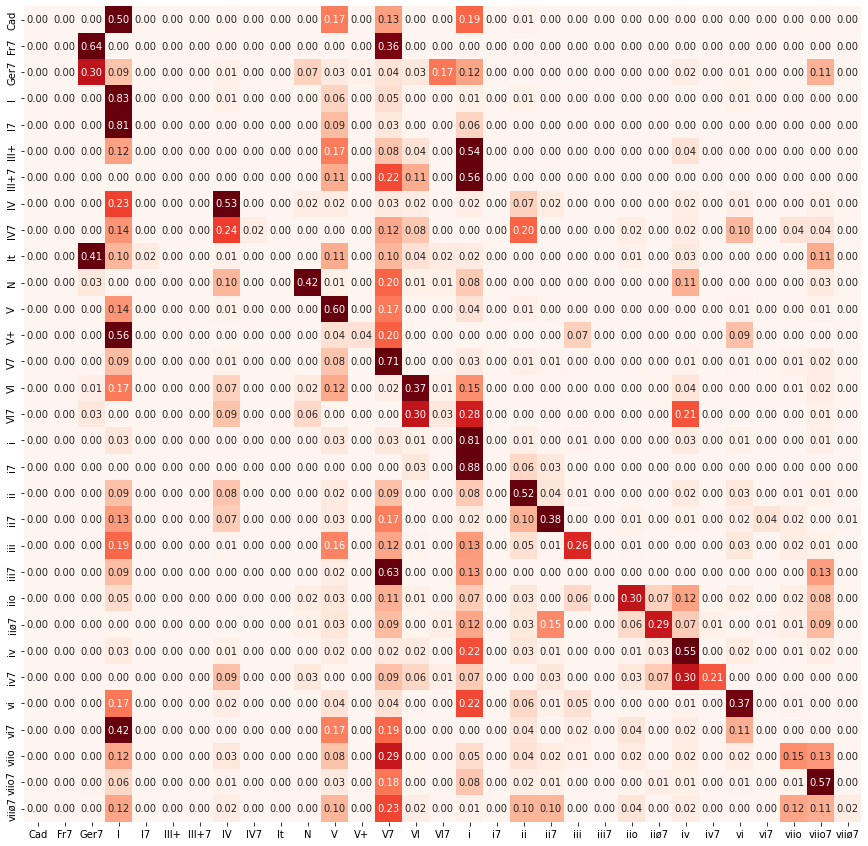

mcleod2021
155120.03099999984
III+7	0.02%	0.00
Fr7	0.03%	0.00
III+	0.06%	0.00
I7	0.08%	0.00
i7	0.09%	0.23
V+	0.12%	0.13
IV7	0.13%	0.00
iii7	0.14%	0.00
vi7	0.14%	0.00
iv7	0.17%	0.09
VI7	0.18%	0.03
It	0.23%	0.00
viiø7	0.28%	0.00
N	0.41%	0.08
Ger7	0.51%	0.00
iio	0.59%	0.08
iiø7	0.75%	0.15
Cad	0.87%	0.00
iii	0.99%	0.16
ii7	1.01%	0.08
VI	1.38%	0.14
vi	1.94%	0.07
iv	1.96%	0.17
viio	2.36%	0.09
ii	3.97%	0.16
IV	4.48%	0.13
viio7	5.04%	0.23
i	11.05%	0.34
V	13.74%	0.34
V7	22.23%	0.33
I	25.05%	0.39


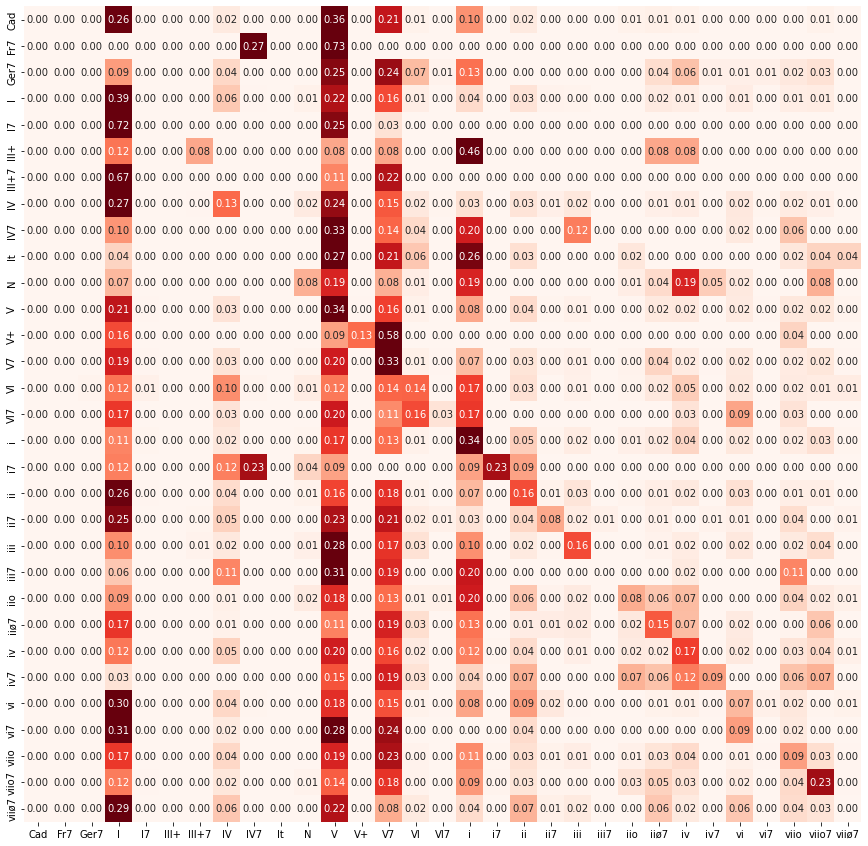

napoleslopez2022
155120.03099999984
III+7	0.02%	0.00
Fr7	0.03%	1.00
III+	0.06%	0.42
I7	0.08%	0.12
i7	0.09%	0.00
V+	0.12%	0.31
IV7	0.13%	0.04
iii7	0.14%	0.26
vi7	0.14%	0.33
iv7	0.17%	0.35
VI7	0.18%	0.20
It	0.23%	0.25
viiø7	0.28%	0.13
N	0.41%	0.30
Ger7	0.51%	0.36
iio	0.59%	0.53
iiø7	0.75%	0.46
Cad	0.87%	0.00
iii	0.99%	0.35
ii7	1.01%	0.49
VI	1.38%	0.31
vi	1.94%	0.30
iv	1.96%	0.46
viio	2.36%	0.40
ii	3.97%	0.61
IV	4.48%	0.51
viio7	5.04%	0.59
i	11.05%	0.79
V	13.74%	0.66
V7	22.23%	0.60
I	25.05%	0.83


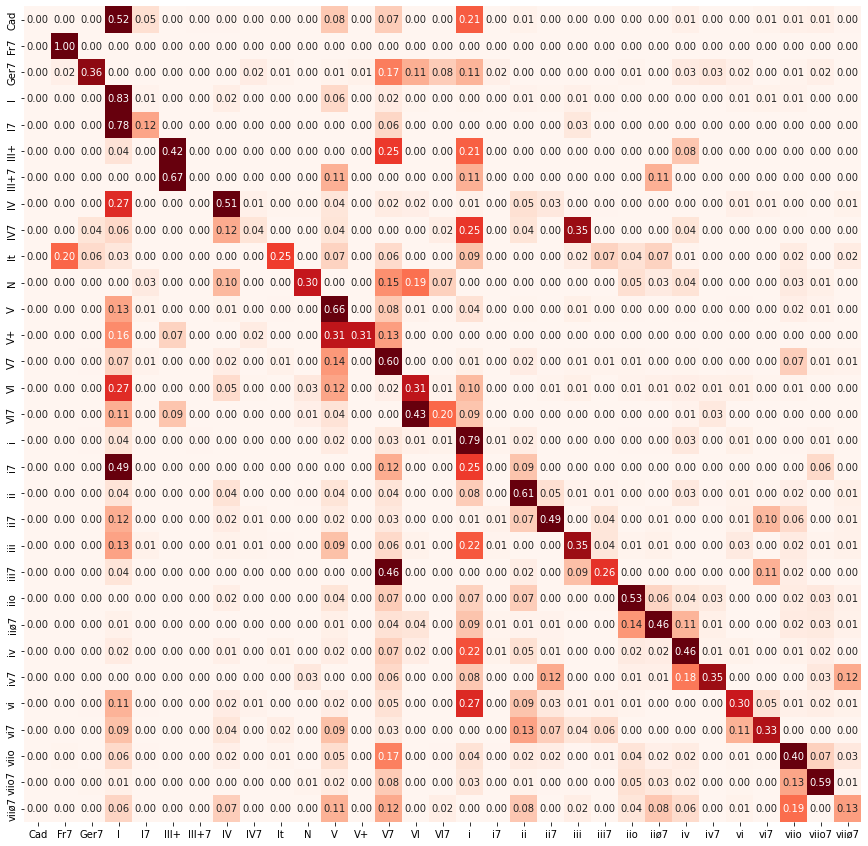

In [5]:
plt.rcParams["figure.figsize"] = (15, 15)
for model in df.model.unique():
    print(model)
    dfmodel = df[df.model == model]
    confusion_matrix = dfmodel.confusion_matrix.apply(lambda x: np.array(eval(x)))
    classes = len(COMMON_ROMAN_NUMERALS)
    conf_matrix = np.zeros((classes, classes))
    for cm in confusion_matrix:
        conf_matrix += cm
    rare_rns = rare_chords(conf_matrix)
    counts = np.sum(conf_matrix, axis=1) + 0.001
    conf_matrix /= counts[:, None]
    # print(np.sum(conf_matrix, axis=1))
    df_cm = pd.DataFrame(conf_matrix, index=COMMON_ROMAN_NUMERALS, columns=COMMON_ROMAN_NUMERALS)
    sns.heatmap(df_cm, cmap="Reds", fmt=".02f", cbar=False, robust=True, annot=True)
    plt.show()
